**Important Liberaries**

In [35]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
import numpy as np
from sklearn.utils import resample


**Loading The Dataset**

In [36]:

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# # Normalize the pixel values to the range [0, 1]
# train_images, test_images = train_images / 255.0, test_images / 255.0


**Reducing the Dataset**

In [58]:
def reduce(labels, images , count):
    NewLabels, counts = np.unique(labels, return_counts=True)

    reduce_labels = []
    reduce_images = []

    for label in NewLabels:
        indices = np.where(labels == label)[0]
        sampled_indices = resample(indices, replace=False, n_samples=count)
        reduce_labels.extend(labels[sampled_indices])
        reduce_images.extend(images[sampled_indices])

    return reduce_labels , reduce_images


# Reduce the size of the dataset by 10 times (min_count = 600 for training, 100 for testing)
new_train_labels , new_train_images = reduce( train_labels, train_images , count=600)
new_test_labels , new_test_images= reduce( test_labels, test_images , count=100)



#converting it into the array
new_train_labels = np.array(new_train_labels)
new_train_images = np.array(new_train_images)
new_test_labels = np.array(new_test_labels)
new_test_images = np.array(new_test_images)


# Create the new_dataset variable
new_dataset = ((new_train_images, new_train_labels), (new_test_images, new_test_labels))

In [51]:
np.shape(new_train_labels)

(6000,)

In [59]:
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(new_dataset[0][1]))

print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(new_dataset[1][1]))

print("___________________")

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

___________________


**Shape of first Image in new training Dataset**

In [55]:
print(new_dataset[0][0][0].shape)

print("___________________")

(28, 28)
___________________


**checking the size of Dataset**

In [56]:
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")

print("There are",len(new_dataset[1][1]),"labels in testing dataset for",len(new_dataset[1][0]),"images in testing dataset")

print("___________________")

There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in testing dataset for 1000 images in testing dataset
___________________


**Checking the correctness of indexing of image and its labels**

Randomly printing 10 images with labels from training dataset
index: 4556
Lable: 7


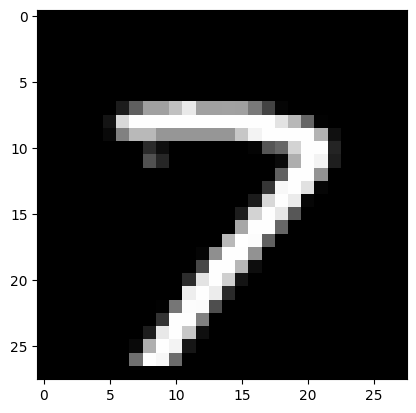

index: 2412
Lable: 4


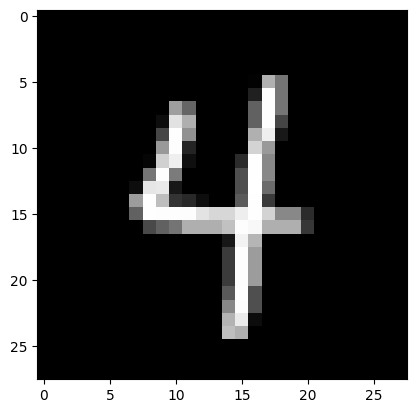

index: 5500
Lable: 9


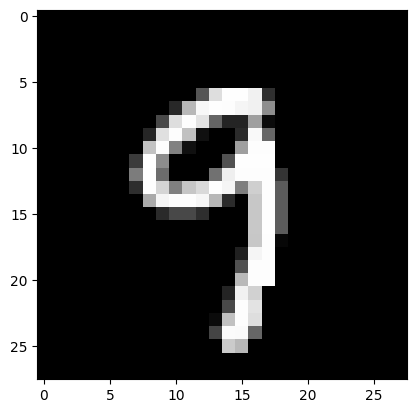

index: 484
Lable: 0


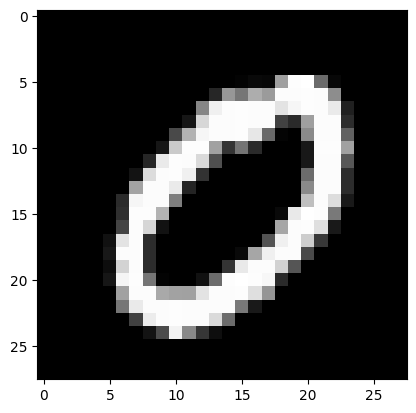

index: 5031
Lable: 8


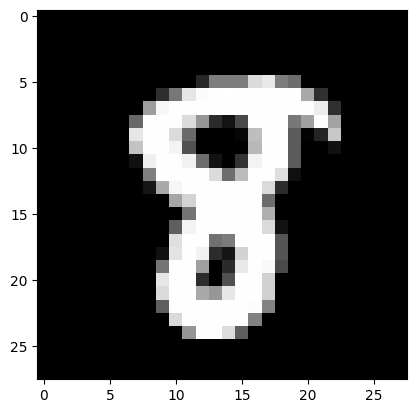

index: 790
Lable: 1


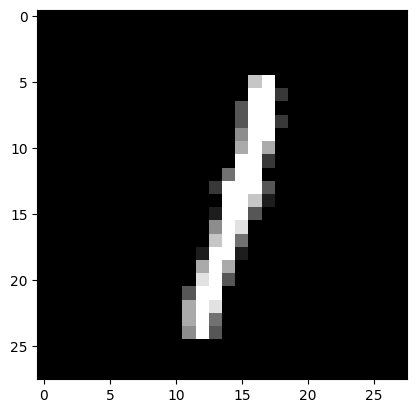

index: 1345
Lable: 2


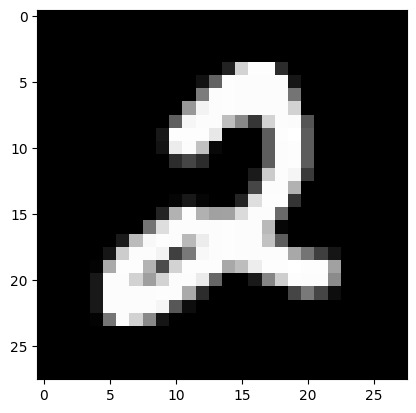

index: 3027
Lable: 5


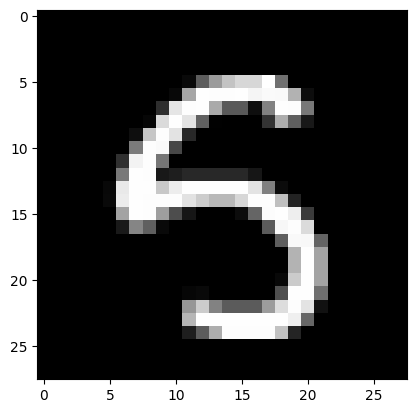

index: 895
Lable: 1


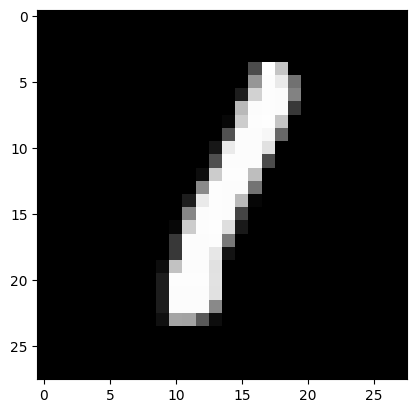

index: 3036
Lable: 5


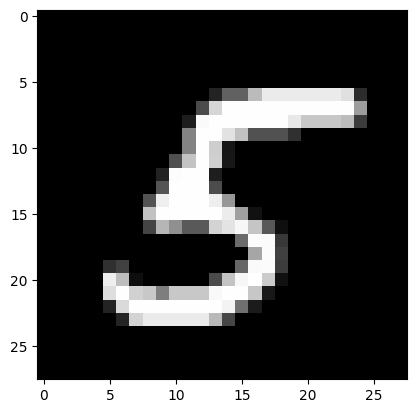

___________________
Randomly printing 10 images with labels from testing dataset
index: 5852
Lable: 9


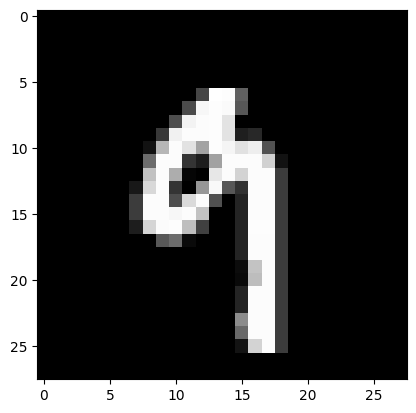

index: 4979
Lable: 8


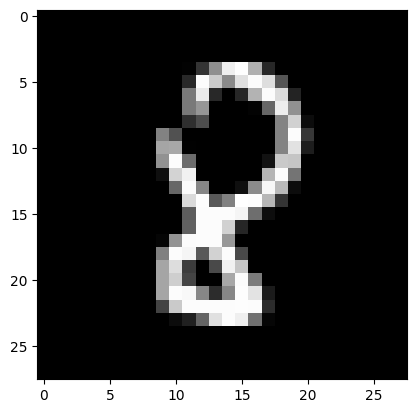

index: 2084
Lable: 3


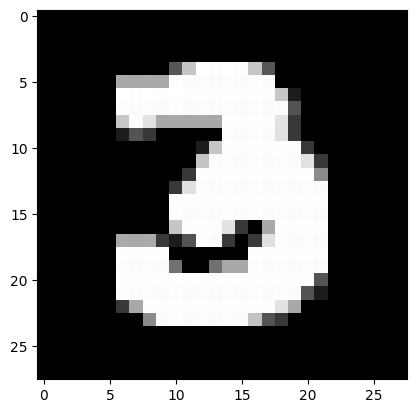

index: 5978
Lable: 9


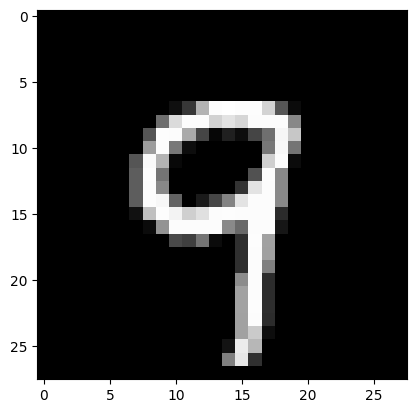

index: 1784
Lable: 2


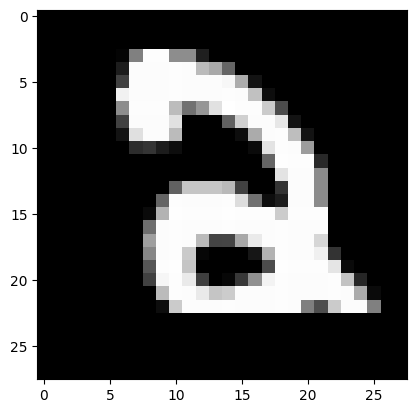

index: 1225
Lable: 2


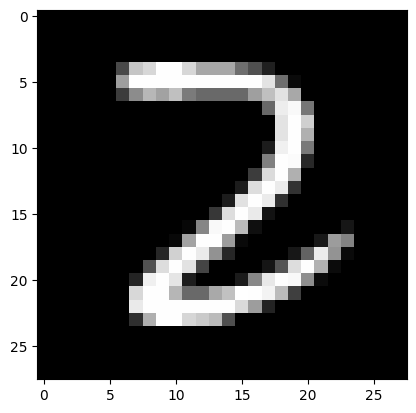

index: 903
Lable: 1


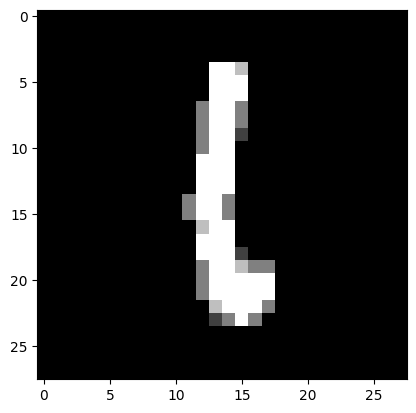

index: 1339
Lable: 2


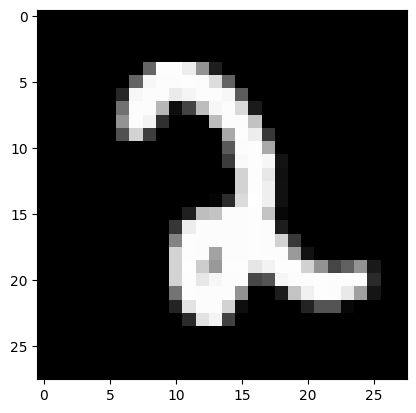

index: 3473
Lable: 5


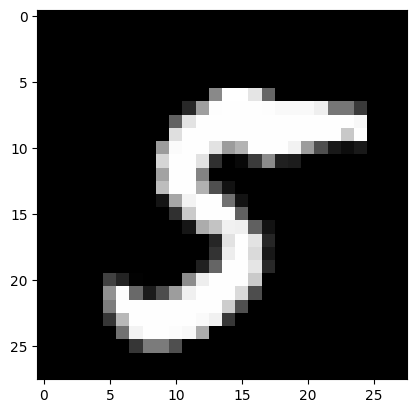

index: 5479
Lable: 9


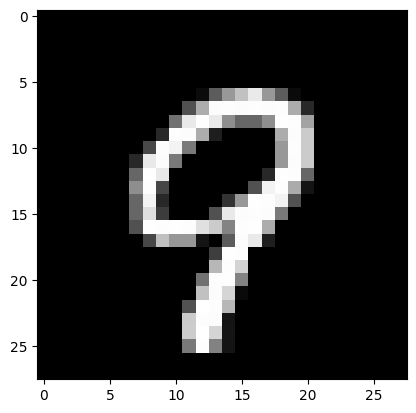

_____________


In [57]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()



print("Randomly printing 10 images with labels from training dataset")

display_random_images_with_labels(new_dataset[0])

print("___________________")

print("Randomly printing 10 images with labels from testing dataset")

display_random_images_with_labels(new_dataset[0])

print("_____________")
